In [1]:
import os, sys
import glob
sys.path.append('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom')
sys.path.append('../')

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import imageio

from blossom import *
from flowerpot import *

In [ ]:
organism_list = dataset_io.load_organism_dataset('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/organisms_ds0010.txt')
organism_list

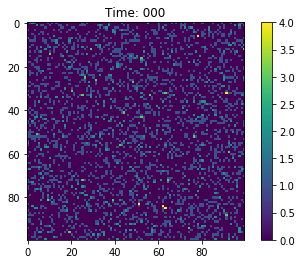

In [2]:
organism_path = '/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/organisms_ds0000.txt'
world_path = '/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/world_ds0000.txt'

import json

with open(organism_path, 'r') as f:
    organism_list = json.load(f)
with open(world_path, 'r') as f:
    world = json.load(f)
    
world_size = world['world_size']
plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

for organism in organism_list:
    if organism['alive']:
        plot[organism['position'][0]][organism['position'][1]] += 1

plt.imshow(plot)
plt.title('Time: %03d' % 0)
# plt.clim(0,10)
plt.colorbar()
plt.savefig('test.png')

In [ ]:
organism_fields = ['alive', 'old_age', 'thirst', 'hunger', 'births']
world_fields = ['water', 'food']
organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/organisms_ds????.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/world_ds????.txt'))

with open(world_paths[0], 'r') as f:
    world = json.load(f)
    
world_size = world['world_size']

time = 100

for field in organism_fields:
    for i in range(time + 1):
        max_val = 0
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
            
        for organism in organism_list:
            if field == 'alive' and organism['alive'] \
            or field == 'old_age' and organism['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism['cause_of_death'] == 'hunger' \
            or field == 'births' and organism['age'] == 0:
                plot[organism['position'][0]][organism['position'][1]] += 1
                
        for j in plot:
            for i in j:
                if i > max_val:
                    max_val = i
                
    for i in range(time + 1):
        plt.close('all')
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
            
        for organism in organism_list:
            if field == 'alive' and organism['alive'] \
            or field == 'old_age' and organism['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism['cause_of_death'] == 'hunger' \
            or field == 'births' and organism['age'] == 0:
                plot[organism['position'][0]][organism['position'][1]] += 1
        
        fig = plt.figure()
        plt.imshow(plot)
        plt.title('Time: %03d' % i)
        plt.clim(0, max_val)
        plt.colorbar()
        plt.savefig('images/image_2d_%s_%03d.png' % (field, i))
        print(field, i)

for field in world_fields:
    for i in range(time + 1):
        max_val = 0
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]
        
        for j in plot:
            for i in j:
                if i > max_val:
                    max_val = i
        
    for i in range(time + 1):
        plt.close('all')
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]

        fig = plt.figure()
        plt.imshow(plot)
        plt.title('Time: %03d' % i)
        plt.clim(0, max_val)
        plt.colorbar()
        plt.savefig('images/image_2d_%s_%03d.png' % (field, i))
        print(field, i)

In [17]:
import imageio

for field in (organism_fields + world_fields):
    filenames = sorted(glob.glob('images/image_2d_%s_???.png' % (field)))
    
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
        
    imageio.mimsave('%s.gif' % field, images, duration=0.1)

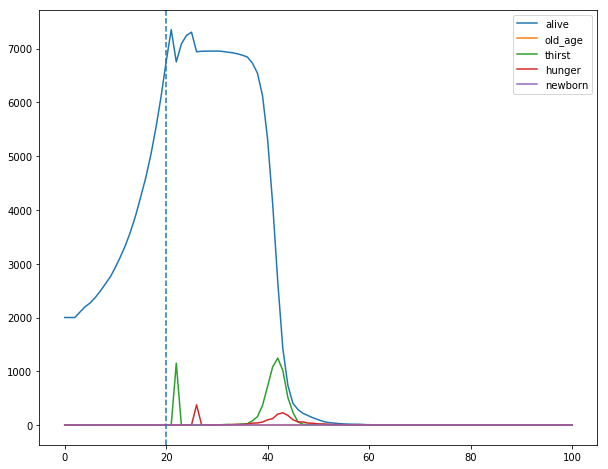

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

organism_fields = ['alive', 'old_age', 'thirst', 'hunger', 'births']
world_fields = ['water', 'food']
organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/organisms_ds????.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/world_ds????.txt'))

time = 100

for i in range(time + 1):
    plt.close('all')
    
    fig = plt.figure(constrained_layout=True, figsize=(10,10))
    gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ax00 = fig.add_subplot(gs[0, 0])
    plt.sca(ax00)

    ax10 = fig.add_subplot(gs[1, 0])
    plt.sca(ax10)

    ax11 = fig.add_subplot(gs[1, 1])
    plt.sca(ax11)

    ax20 = fig.add_subplot(gs[2, 0])
    plt.sca(ax20)

    ax21 = fig.add_subplot(gs[2, 1])
    plt.sca(ax21)

    ax22 = fig.add_subplot(gs[2, 2])
    plt.sca(ax22)

    ax01 = fig.add_subplot(gs[0, 1])
    plt.sca(ax01)

    for field in organism_fields:
    
        world_size = [10, 10]
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
            
        for organism in organism_list:
            if field == 'alive' and organism['alive'] \
            or field == 'old_age' and organism['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism['cause_of_death'] == 'hunger' \
            or field == 'births' and organism['age'] == 0:
                plot[organism['position'][0]][organism['position'][1]] += 1
                
    for field in world_fields:
        world_size = [10, 10]
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]
        
    plt.imshow(plot)
    plt.clim(0,10)
    plt.colorbar()
        
    plt.savefig('images/image_2d_%s_%03d.png' % (field, i))

for field in world_fields:
    for i in range(time + 1):
        plt.close('all')
        
        world_size = [10, 10]
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]

        fig = plt.figure()
        plt.imshow(plot)
        plt.clim(0,100)
        plt.colorbar()
        plt.savefig('images/image_2d_%s_%03d.png' % (field, i))

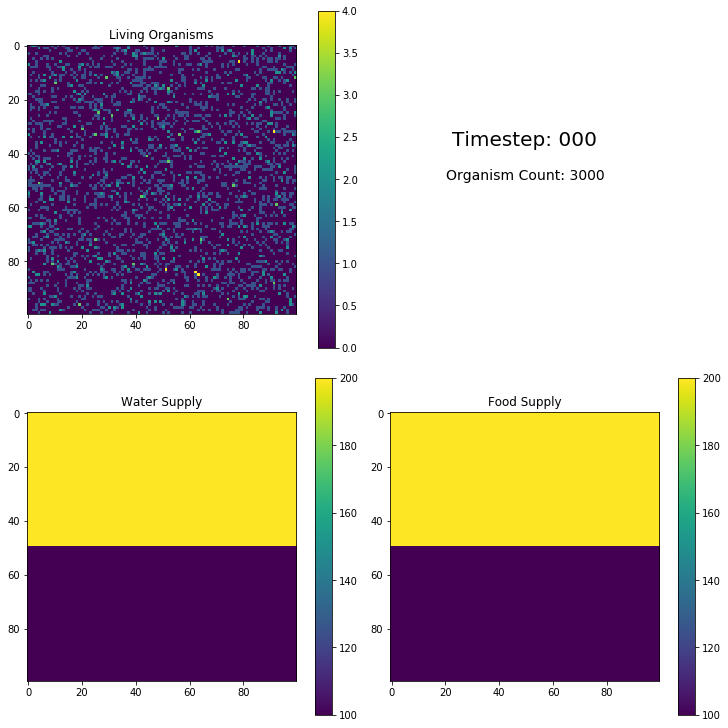

In [38]:
# Try GridSpec
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

time = 100

organism_path = '/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/organisms_ds0000.txt'
world_path = '/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/world_ds0000.txt'

total = 0
    
fig = plt.figure(constrained_layout=True, figsize=(10,10))
gs = gridspec.GridSpec(ncols=4, nrows=4, figure=fig)

ax0 = fig.add_subplot(gs[0:2, 0:2])
plt.sca(ax0)
with open(organism_path, 'r') as f:
    organism_list = json.load(f)
with open(world_path, 'r') as f:
    world = json.load(f)
    
world_size = world['world_size']
plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

for organism in organism_list:
    if organism['alive']:
        plot[organism['position'][0]][organism['position'][1]] += 1
        total += 1

plt.imshow(plot)
plt.title('Living Organisms')
# plt.clim(0,10)
plt.colorbar()

ax1 = fig.add_subplot(gs[2:4, 0:2])
plt.sca(ax1)
with open(world_path, 'r') as f:
    world = json.load(f)
    
plot = world['water']

plt.imshow(plot)
plt.title('Water Supply')
# plt.clim(0,10)
plt.colorbar()

ax2 = fig.add_subplot(gs[2:4, 2:4])
plt.sca(ax2)
with open(world_path, 'r') as f:
    world = json.load(f)
    
plot = world['food']

plt.imshow(plot)
plt.title('Food Supply')
# plt.clim(0,10)
plt.colorbar()


ax = fig.add_subplot(gs[0:2, 2:4], frameon=False)
plt.sca(ax)
ax.annotate('Timestep: %03d' % 0, xy=(0.5, 0.5), 
            xytext=(0.5, 0.6), textcoords='axes fraction', 
            fontsize=20, horizontalalignment='center')
ax.annotate('Organism Count: %04d' % total, xy=(0.5, 0.5), 
            xytext=(0.5, 0.5), textcoords='axes fraction', 
            fontsize=14, horizontalalignment='center')

plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
    
plt.show()

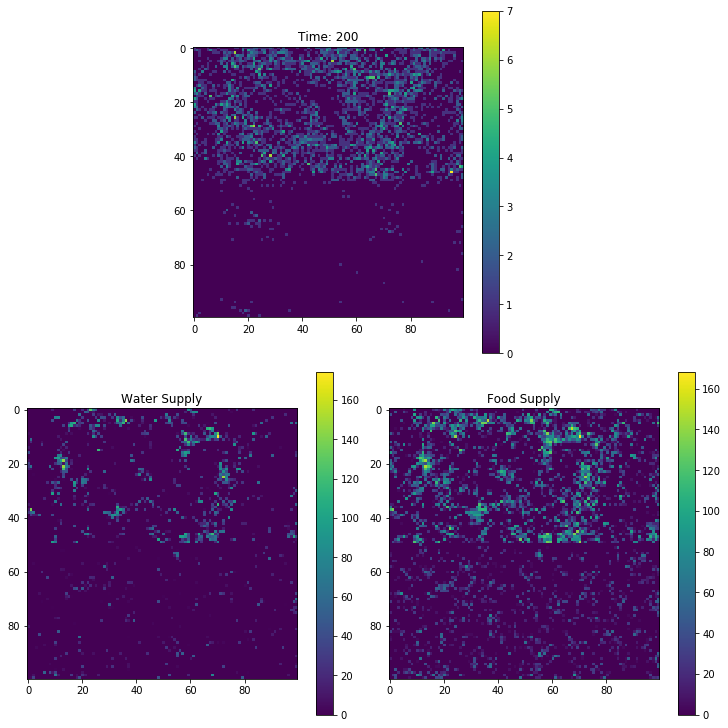

In [19]:
organism_fields = ['alive']
world_fields = ['water', 'food']
organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/organisms_ds????.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/world_ds????.txt'))

with open(world_paths[0], 'r') as f:
    world = json.load(f)
    
world_size = world['world_size']

time = 200

maxes = []

for field in organism_fields:
    for i in range(time + 1):
        max_val = 0
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
            
        for organism in organism_list:
            if field == 'alive' and organism['alive'] \
            or field == 'old_age' and organism['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism['cause_of_death'] == 'hunger' \
            or field == 'births' and organism['age'] == 0:
                plot[organism['position'][0]][organism['position'][1]] += 1
                
        for j in plot:
            for i in j:
                if i > max_val:
                    max_val = i
                    
    maxes.append(max_val)
                
for field in world_fields:
    for i in range(time + 1):
        max_val = 0
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]
        
        for j in plot:
            for i in j:
                if i > max_val:
                    max_val = i
        
    maxes.append(max_val)
    
# Make images
for t in range(time + 1):
    plt.close('all')
    
    organism_path = organism_paths[t]
    world_path = world_paths[t]
    
    fig = plt.figure(constrained_layout=True, figsize=(10,10))
    gs = gridspec.GridSpec(ncols=4, nrows=4, figure=fig)

    ax0 = fig.add_subplot(gs[0:2, 1:3])
    plt.sca(ax0)
    with open(organism_path, 'r') as f:
        organism_list = json.load(f)
    with open(world_path, 'r') as f:
        world = json.load(f)

    world_size = world['world_size']
    plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

    for organism in organism_list:
        if organism['alive']:
            plot[organism['position'][0]][organism['position'][1]] += 1

    plt.imshow(plot)
    plt.title('Time: %03d' % t)
    plt.clim(0, maxes[0])
    plt.colorbar()

    ax1 = fig.add_subplot(gs[2:4, 0:2])
    plt.sca(ax1)
    with open(world_path, 'r') as f:
        world = json.load(f)

    plot = world['water']

    plt.imshow(plot)
    plt.title('Water Supply')
    plt.clim(0, maxes[1])
    plt.colorbar()

    ax2 = fig.add_subplot(gs[2:4, 2:4])
    plt.sca(ax2)
    with open(world_path, 'r') as f:
        world = json.load(f)

    plot = world['food']

    plt.imshow(plot)
    plt.title('Food Supply')
    plt.clim(0, maxes[2])
    plt.colorbar()
    
    plt.savefig('images/image_2d_combined_%03d.png' % (t))


filenames = sorted(glob.glob('images/image_2d_%s_???.png' % ('combined')))
    
images = []
for filename in filenames:
    images.append(imageio.imread(filename))

imageio.mimsave('combined.gif', images, duration=0.1)

[10, 200, 200]


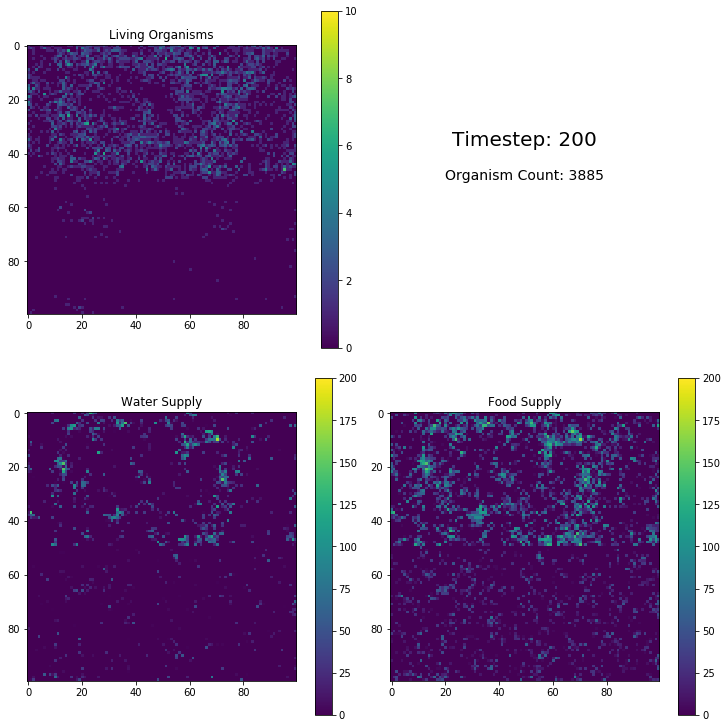

In [42]:
organism_fields = ['alive']
world_fields = ['water', 'food']
organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/organisms_ds????.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/world_ds????.txt'))

with open(world_paths[0], 'r') as f:
    world = json.load(f)
    
world_size = world['world_size']

time = 200

maxes = []

for field in organism_fields:
    max_val = 0
    
    for i in range(time + 1):    
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
            
        for organism in organism_list:
            if field == 'alive' and organism['alive'] \
            or field == 'old_age' and organism['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism['cause_of_death'] == 'hunger' \
            or field == 'births' and organism['age'] == 0:
                plot[organism['position'][0]][organism['position'][1]] += 1
                
        for j in plot:
            for i in j:
                if i > max_val:
                    max_val = i
                    
    maxes.append(max_val)
                
for field in world_fields:
    max_val = 0
    
    for i in range(time + 1):
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]
        
        for j in plot:
            for i in j:
                if i > max_val:
                    max_val = i
        
    maxes.append(max_val)
    
print(maxes)
    
# Make images
for t in range(time + 1):
    plt.close('all')
    
    total = 0
    
    organism_path = organism_paths[t]
    world_path = world_paths[t]
    
    fig = plt.figure(constrained_layout=True, figsize=(10,10))
    gs = gridspec.GridSpec(ncols=4, nrows=4, figure=fig)

    ax0 = fig.add_subplot(gs[0:2, 0:2])
    plt.sca(ax0)
    with open(organism_path, 'r') as f:
        organism_list = json.load(f)
    with open(world_path, 'r') as f:
        world = json.load(f)

    world_size = world['world_size']
    plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

    for organism in organism_list:
        if organism['alive']:
            plot[organism['position'][0]][organism['position'][1]] += 1
            total += 1

    plt.imshow(plot)
    plt.title('Living Organisms')
    plt.clim(0, maxes[0])
    plt.colorbar()

    ax1 = fig.add_subplot(gs[2:4, 0:2])
    plt.sca(ax1)
    with open(world_path, 'r') as f:
        world = json.load(f)

    plot = world['water']

    plt.imshow(plot)
    plt.title('Water Supply')
    plt.clim(0, maxes[1])
    plt.colorbar()

    ax2 = fig.add_subplot(gs[2:4, 2:4])
    plt.sca(ax2)
    with open(world_path, 'r') as f:
        world = json.load(f)

    plot = world['food']

    plt.imshow(plot)
    plt.title('Food Supply')
    plt.clim(0, maxes[2])
    plt.colorbar()


    ax = fig.add_subplot(gs[0:2, 2:4], frameon=False)
    plt.sca(ax)
    ax.annotate('Timestep: %03d' % t, xy=(0.5, 0.5), 
                xytext=(0.5, 0.6), textcoords='axes fraction', 
                fontsize=20, horizontalalignment='center')
    ax.annotate('Organism Count: %04d' % total, xy=(0.5, 0.5), 
                xytext=(0.5, 0.5), textcoords='axes fraction', 
                fontsize=14, horizontalalignment='center')

    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    
    plt.savefig('images/image_2d_combined_%03d.png' % (t))


filenames = sorted(glob.glob('images/image_2d_%s_???.png' % ('combined')))
    
images = []
for filename in filenames:
    images.append(imageio.imread(filename))

imageio.mimsave('combined.gif', images, duration=0.1)

In [1]:
import os, sys
import glob
sys.path.append('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom')
sys.path.append('../')

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import imageio

from blossom import *
from flowerpot import *

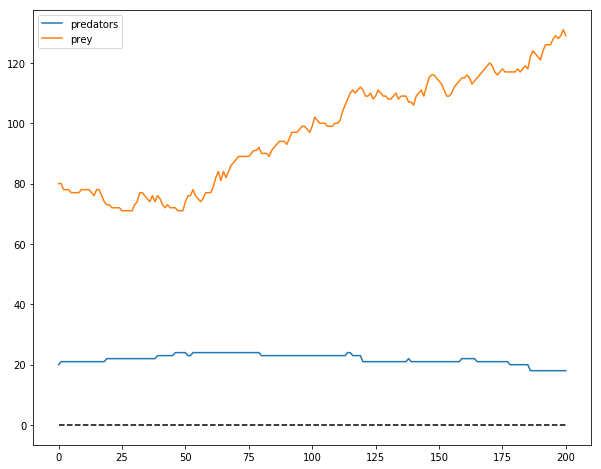

In [28]:
time = 200

organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/my_scripts/predator_prey/datasets/organisms_ds???.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/my_scripts/predator_prey/datasets/world_ds???.txt'))


fields = ['alive']
species = ['predator1', 'prey1']

fig = plt.figure(figsize=(10,8))
for field in fields:
    predators = []
    prey = []
    for i in range(time + 1):
        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        predator_count = 0
        prey_count = 0
        for organism_dict in organism_list:
            if field == 'alive' and organism_dict['alive']:
                if organism_dict['species_name'] == 'predator1':
                    predator_count += 1
                elif organism_dict['species_name'] == 'prey1':
                    prey_count += 1
        predators.append(predator_count)
        prey.append(prey_count)

    plt.plot(predators, label='predators')
    plt.plot(prey, label='prey')
plt.plot([0]*len(prey), 'k--')
# plt.axvline(x=10, linestyle='--')
# plt.yscale('symlog')
# plt.yscale('log')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
plt.legend()
plt.show()

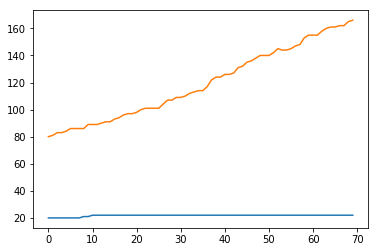

In [25]:
last = 70
plt.plot(predators[0:last])
plt.plot(prey[0:last])

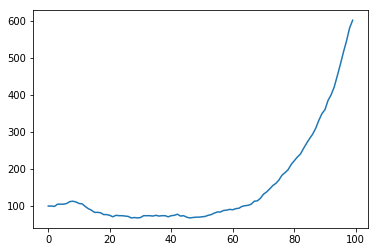

In [51]:
plt.plot(prey[0:100])